In [4]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\weakest-two-synthetic-from-data
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\weakest-two-synthetic-from-data
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [3]:
def plot_fig(ax,dist, len_x, **kwargs):
    minima = np.amin(dist, axis=0)

    dist = dist.flatten()
    dist.sort()

    minima_over = np.tile(np.nan, len_x)
    
    for i in range(len_x):
        minima_over[i] = np.sum(minima > dist[i])

    xvals = np.arange(len_x)/n_systems
    ax.plot(xvals, minima_over/n_systems, **kwargs) #label="uniform",color="black", lw=0.5)

In [5]:
gammas_N1024_P1e_2 = np.load(r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2-gammas.npy")
gammas_N1024_P1e_2 = gammas_N1024_P1e_2[gammas_N1024_P1e_2<1e9]
Nc_N1024_P1e_2 = 1147
gammas_N16_P1e_6 = np.load(r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-6-gammas.npy")
gammas_N16_P1e_6 = gammas_N16_P1e_6[gammas_N16_P1e_6<1e9]
Nc_N16_P1e_6 = 16

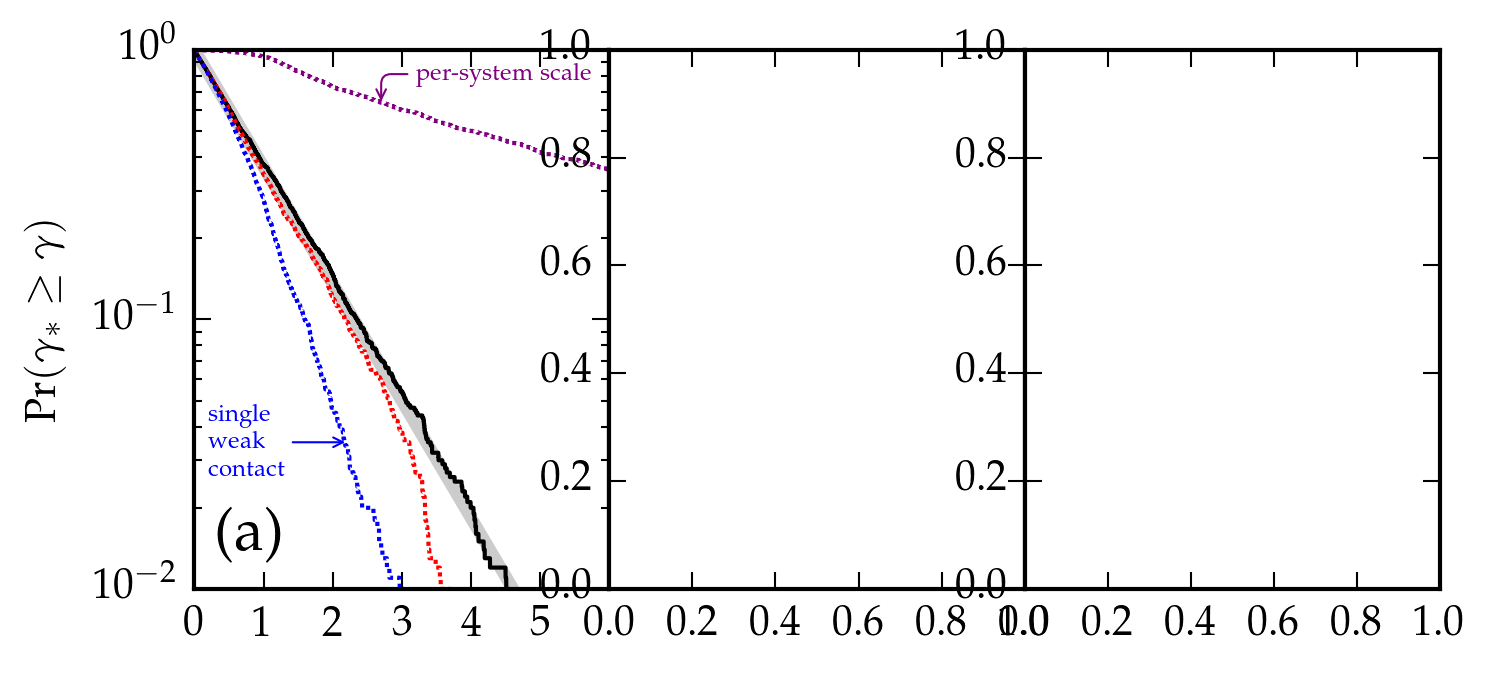

In [29]:
f = fullfig()
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

ax = ax1
ax.cla()

plt.subplots_adjust(wspace=0)


numpy.random.seed(0)
n_systems = 1000


xvals = linspace(0,6)
len_x = int(max(xvals) * n_systems)
ax.plot(xvals, exp(-xvals), lw=3, color=(0.8,0.8,0.8))

plot_fig(ax,np.random.choice(gammas_N1024_P1e_2, size=(Nc_N1024_P1e_2,n_systems)),len_x,
         label="N1024 P1e-2",color="black")

plot_fig(ax,np.random.choice(gammas_N16_P1e_6, size=(Nc_N16_P1e_6,n_systems)),len_x,
         label="N16 P1e-6",color="red", ls=":", dashes=[1,1])


# w/ single weak
data = np.random.choice(gammas_N1024_P1e_2, size=(Nc_N1024_P1e_2,n_systems))
for row in data.T:
    row[np.where(row < 1e9)[0][0]] *= 1e-3

plot_fig(ax,data,len_x,
         label="N1024 P1e-2 w/ weak",color="blue", ls=":", dashes=[1,1])


data = np.random.choice(gammas_N1024_P1e_2, size=(Nc_N1024_P1e_2,n_systems))
data *= np.random.uniform(size=n_systems)

plot_fig(ax,data,len_x,
         label="N1024 P1e-2 w/ scale",color="purple", ls=":", dashes=[1,1])

pss_dist = data.copy()
pss_len_x = len_x

xlabel = r"$\langle N_{\textrm{bk}} \rangle \Pr(\gamma_{ij} < \gamma)$"

#ax.set_xlabel(xlabel)
ax.set_ylabel("$\Pr(\gamma_{*} \geq \gamma)$")
ax.set_yscale('log')
ax.set_ylim(1e-2, 1)
ax.set_xlim(0,6)
ax.set_xticks([0,1,2,3,4,5])

subplotlabel('(a)', 'lower left', ax=ax)

ax.annotate(
    "per-system scale",
    (2.7, 6e-1),
    (3.2, 9e-1),
    ha='left',
    va='top',
    color='purple',
    fontsize='xx-small',
    arrowprops=dict(
        arrowstyle="->",
        color='purple',
        connectionstyle="angle,angleA=0,angleB=270,rad=10",
        linewidth=0.5,
        shrinkA=0,
    ),
)

ax.annotate(
    "single\nweak\ncontact",
    (2.3, 3.5e-2),#(0.9, 5e-2),
    (0.2, 3.5e-2),#(1.8, 2.3e-2),
    ha='left',
    va='center',
    color='blue',
    fontsize='xx-small',
    arrowprops=dict(
        arrowstyle="->",
        color='blue',
        #connectionstyle="angle,angleA=270,angleB=0,rad=10",
        linewidth=0.5,
        shrinkA=0,
    ),
)

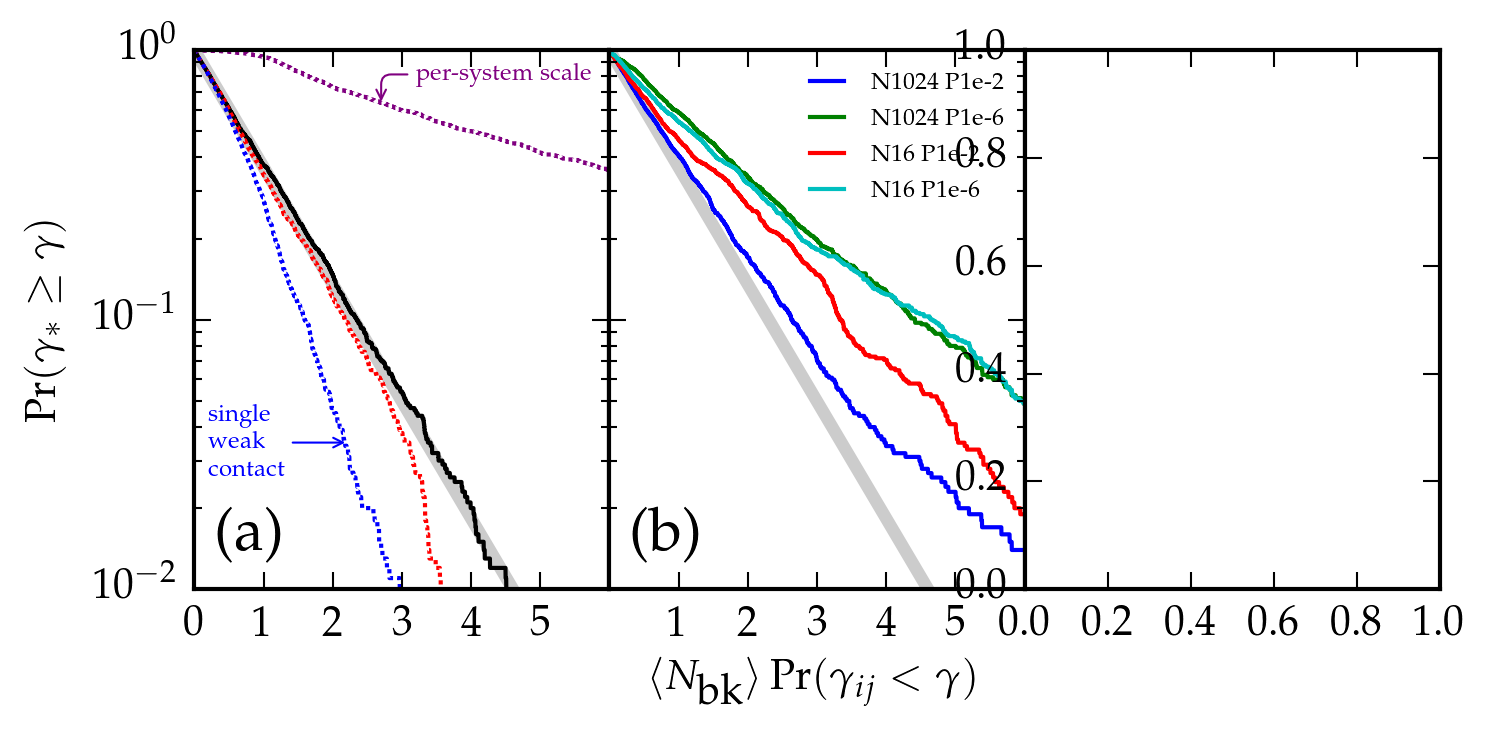

In [30]:
# now calculate the same from distributions
import glob

stopat = 1000

ax = ax2
ax.cla()
setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(xlabel)
ax.set_yscale('log')
ax.set_ylim(1e-2, 1)
ax.set_xlim(0,6)
ax.set_xticks([1,2,3,4,5])



xvals = linspace(0,6)
ax.plot(xvals, exp(-xvals), lw=3, color=(0.8,0.8,0.8))


for d in [r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-6",
        #  r"E:\PhD rearrangements\auto\linres_upps\N256~P1e-2",
        #  r"E:\PhD rearrangements\auto\linres_upps\N256~P1e-6",
          r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-6",
          ]:
    try:
            lp = d.split('\\')[-1]
            N,P = lp.split("~")
            N = int(N[1:])
            P = float(P[1] + "." + P[2:])
    except ValueError:
        continue

    if P >= 1e-1 or P<=1e-7:
        continue

    pathname = os.path.split(d)[1]
    allgammas = []
    minima = []
    
    i = 0
    Ns = []
    sources = []
    files = glob.glob(d + r"\????.npy")
    if len(files) < 30:
        continue

    try:
        allgammas = np.load(d + "_weakest-two-allgammas.npy")
        minima = np.load(d + "_weakest-two-minima.npy", minima)
    except Exception as e:
        print "Could not load precompiled data: ", e
    
        for j,fn in enumerate(files):
            if j > stopat:
                break
            if j%100 == 0:
                os.write(1, "%i/%i files processed" % (j,len(files)))
            i += 1

            try:
                x=np.load(fn)
            except Exception as e:
                print fn, e
                continue

            up = x.tolist()['u_par']
            delta = x.tolist()['deltas']

            mask = (delta > 0) * np.isfinite(up)
            Ns.append(np.sum(mask)/2)
            gammas = (delta[mask]) / (up[mask])

            gammas[gammas < 0] = 1e10
            gammas = gammas[np.isfinite(gammas) * (gammas > 1e-14)] # rattlers don't count
            gammas.sort()
            gammas = gammas[::2] # remove duplicates

            allgammas.append(gammas)
            minima.append(np.amin(gammas))

        np.save(d + "_weakest-two-allgammas.npy", allgammas)
        np.save(d + "_weakest-two-minima.npy", minima)
        
    dist = np.concatenate(allgammas)
    dist = dist[dist>0]
    dist.sort()



    n_systems = len(minima)
    len_x = n_systems * 6

    is_min = np.tile(False, len_x)

    for i in range(len_x):
        is_min[i] = dist[i] in minima

    xvals = np.arange(len_x)/n_systems

    
    p = ax.plot(xvals, 1-np.cumsum(is_min)/n_systems, label=d.split("\\")[-1])
       

ax.legend(fontsize='xx-small', loc='upper right', frameon=False)
subplotlabel('(b)', 'lower left', ax=ax)
#savefig("data.pdf")

f

6000


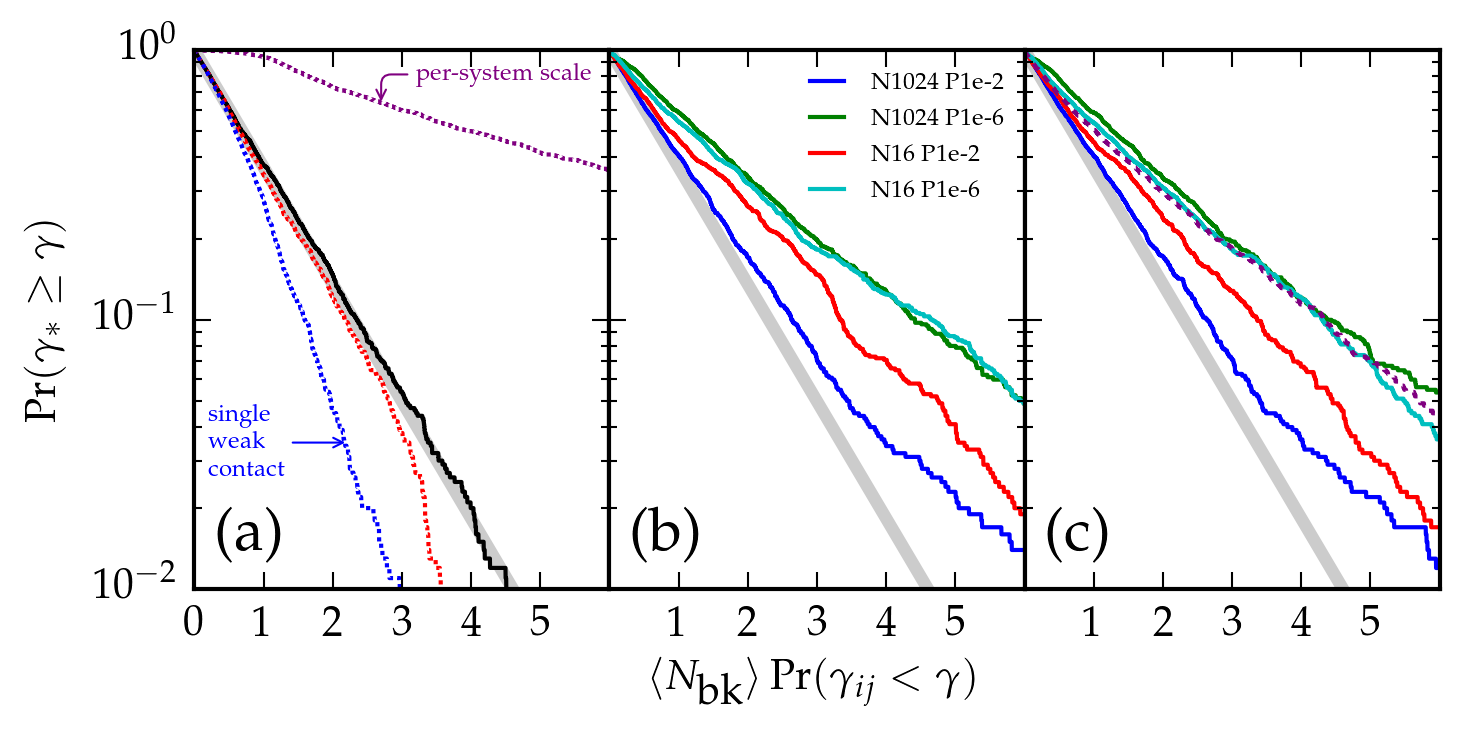

In [31]:
# now calculate the same from distributions
import glob
stopat = 1000

ax = ax3
ax.cla()
setp(ax.get_yticklabels(), visible=False)
#ax.set_xlabel(xlabel)
ax.set_yscale('log')
ax.set_ylim(1e-2, 1)
ax.set_xlim(0,6)
ax.set_xticks([1,2,3,4,5])

xvals = linspace(0,6)
ax.plot(xvals, exp(-xvals), lw=3, color=(0.8,0.8,0.8))

for d in [r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-6",
          r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-2",
          r"E:\PhD rearrangements\auto\linres_upps\N16~P1e-6",
          ]:
    try:
            lp = d.split('\\')[-1]
            N,P = lp.split("~")
            N = int(N[1:])
            P = float(P[1] + "." + P[2:])
    except ValueError:
        continue

    if P >= 1e-1 or P<=1e-7:
        continue

    pathname = os.path.split(d)[1]
    allgammas = []
    minima = []
    
    i = 0
    Ns = []
    sources = []
    files = glob.glob(d + r"\????.npy")
    if len(files) < 30:
        continue

    try:
        allgammas = np.load(d + "_weakest-two-allgammas.npy")
        minima = np.load(d + "_weakest-two-minima.npy", minima)
    except Exception as e:
        print "Could not load precompiled data: ", e
        raise
       
    dist = np.concatenate(allgammas)
    dist.sort()
    dist = dist[dist>0]

    n_systems = len(minima)
    len_x = n_systems * 6

    is_min = np.tile(False, len_x)

    for i in range(len_x):
        is_min[i] = dist[i] in minima

    xvals = np.arange(len_x)/n_systems

    
    #p = ax.plot(xvals, 1-np.cumsum(is_min)/n_systems, label=d.split("\\")[-1], lw=0.5, dashes=(1,1))
    #c = p[0].get_color()
    
    s1 = np.array([np.mean(x) for x in allgammas])
    
    for scales in [s1]:

        dist = np.concatenate([x/s for (x,s) in zip(allgammas, scales)])
        scaledminima = minima/scales
        dist.sort()

        is_min = np.tile(False, len_x)

        for i in range(len_x):
            is_min[i] = dist[i] in scaledminima

        xvals = np.arange(len_x)/n_systems
        ax.plot(xvals, 1-np.cumsum(is_min)/n_systems)        

print pss_len_x       
plot_fig(ax,pss_dist/np.mean(pss_dist, axis=0),pss_len_x,color="purple", dashes=(2,2))

ax.legend(fontsize='xx-small', loc='upper right', frameon=False)
subplotlabel('(c)', 'lower left', ax=ax)
f.savefig("mMkM-triplet.pdf")

f